In [2]:
import pandas as pd

df = pd.read_csv('datasett.csv')

print(df.info())
print("\n5 baris pertama:")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         5000 non-null   int64  
 1   name                5000 non-null   object 
 2   gender              5000 non-null   object 
 3   join_date           5000 non-null   object 
 4   region              5000 non-null   object 
 5   device              5000 non-null   object 
 6   num_transactions    5000 non-null   int64  
 7   total_spent         4321 non-null   float64
 8   last_purchase_date  4321 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 351.7+ KB
None

5 baris pertama:
   customer_id                   name gender   join_date        region  \
0            1          Kayla Preston      F  2023-04-14  Rhode Island   
1            2           Melissa West      F  2023-09-21      Virginia   
2            3       Martin Blackwell      F  

In [3]:
import numpy as np

df['total_spent'] = df['total_spent'].fillna(0)
df['join_date'] = pd.to_datetime(df['join_date'])
df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'])
df['last_purchase_date'] = df['last_purchase_date'].fillna(df['join_date'])

print("\nInformasi dataset setelah pre-processing:")
print(df.info())

# Keterangan kode:
# 1. Mengisi nilai yang hilang pada kolom 'total_spent' dengan 0, menandakan pelanggan belum melakukan transaksi.
# 2. Mengubah kolom 'join_date' dan 'last_purchase_date' menjadi format datetime agar bisa dilakukan operasi tanggal.
# 3. Mengisi nilai yang hilang pada 'last_purchase_date' dengan nilai dari 'join_date', menandakan pelanggan belum bertransaksi sejak bergabung.
# 4. Menampilkan informasi dataset setelah proses pre-processing untuk memverifikasi perubahan tipe data dan pengisian nilai hilang.


Informasi dataset setelah pre-processing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         5000 non-null   int64         
 1   name                5000 non-null   object        
 2   gender              5000 non-null   object        
 3   join_date           5000 non-null   datetime64[ns]
 4   region              5000 non-null   object        
 5   device              5000 non-null   object        
 6   num_transactions    5000 non-null   int64         
 7   total_spent         5000 non-null   float64       
 8   last_purchase_date  5000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 351.7+ KB
None


In [4]:
df.columns.tolist()

['customer_id',
 'name',
 'gender',
 'join_date',
 'region',
 'device',
 'num_transactions',
 'total_spent',
 'last_purchase_date']

In [6]:
from datetime import date

today = pd.to_datetime(date.today())

df['recency'] = (today - df['last_purchase_date']).dt.days
df['frequency'] = df['num_transactions']
df['monetary'] = df['total_spent']
df['customer_age'] = (today - df['join_date']).dt.days
df['avg_spent_per_txn'] = df['monetary'] / df['frequency'].replace(0,1)
df['freq_per_month'] = df['frequency'] / (df['customer_age']/30 + 1e-6)
df['is_high_value'] = (df['monetary'] > df['monetary'].median()).astype(int)
df['device_region'] = df['device'] + "_" + df['region']
df['age_bin'] = pd.cut(df['customer_age'], bins=[0, 180, 730, 3650], labels=['new','mid','veteran'])
df['monetary_bin'] = pd.qcut(df['monetary'], q=3, labels=['low','medium','high'])

print("\n5 baris pertama dengan fitur baru:")
print(df.head())

# Keterangan kode:
# 1. Menentukan tanggal hari ini sebagai acuan untuk menghitung fitur berbasis waktu.
# 2. Membuat fitur RFM:
#    - recency: jarak hari sejak pembelian terakhir.
#    - frequency: jumlah transaksi pelanggan.
#    - monetary: total pengeluaran pelanggan.
# 3. Fitur tambahan:
#    - customer_age: umur pelanggan sejak bergabung.
#    - avg_spent_per_txn: rata-rata pengeluaran per transaksi.
#    - freq_per_month: normalisasi frekuensi transaksi per bulan.
#    - is_high_value: penanda pelanggan bernilai tinggi berdasarkan median pengeluaran.
# 4. Fitur interaksi kategori: menggabungkan device dan region menjadi satu kolom.
# 5. Fitur binning:
#    - age_bin: mengelompokkan umur pelanggan menjadi 'new', 'mid', dan 'veteran'.
#    - monetary_bin: mengelompokkan total pengeluaran menjadi 'low', 'medium', dan 'high' menggunakan kuantil.
# 6. Menampilkan 5 baris pertama untuk memverifikasi penambahan fitur baru.


5 baris pertama dengan fitur baru:
   customer_id                   name gender  join_date        region  \
0            1          Kayla Preston      F 2023-04-14  Rhode Island   
1            2           Melissa West      F 2023-09-21      Virginia   
2            3       Martin Blackwell      F 2024-11-10      Maryland   
3            4   Christopher Williams      M 2023-12-08      Nebraska   
4            5  Christopher Hernandez      F 2024-09-09        Kansas   

    device  num_transactions  total_spent last_purchase_date  recency  \
0  Desktop                 2      1777.38         2025-05-26      100   
1  Desktop                 2      1188.36         2025-06-01       94   
2   Mobile                 0         0.00         2024-11-10      297   
3  Desktop                 0         0.00         2023-12-08      635   
4   Tablet                 1       157.45         2025-01-26      220   

   frequency  monetary  customer_age  avg_spent_per_txn  freq_per_month  \
0          

In [7]:
df.columns.tolist()

['customer_id',
 'name',
 'gender',
 'join_date',
 'region',
 'device',
 'num_transactions',
 'total_spent',
 'last_purchase_date',
 'recency',
 'frequency',
 'monetary',
 'customer_age',
 'avg_spent_per_txn',
 'freq_per_month',
 'is_high_value',
 'device_region',
 'age_bin',
 'monetary_bin']

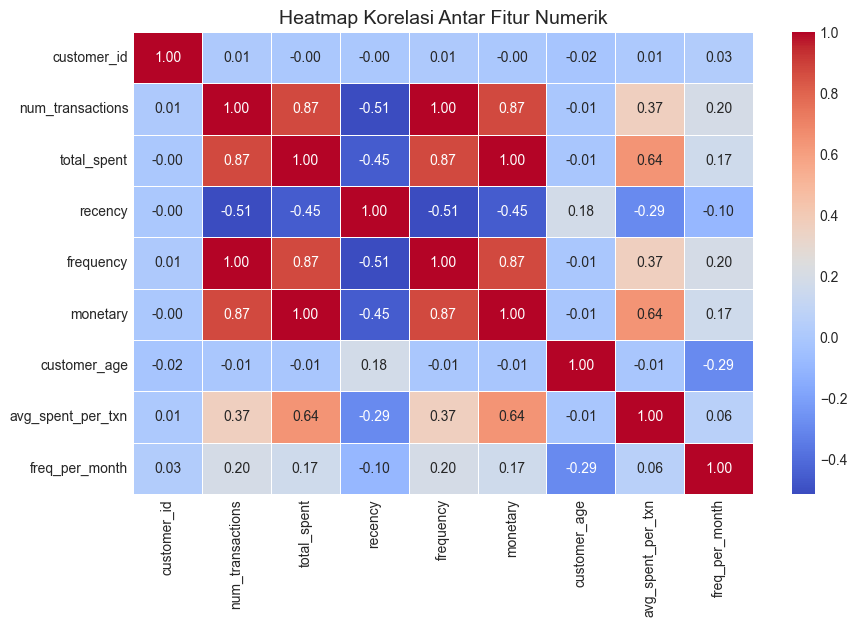

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur Numerik", fontsize=14)
plt.show()


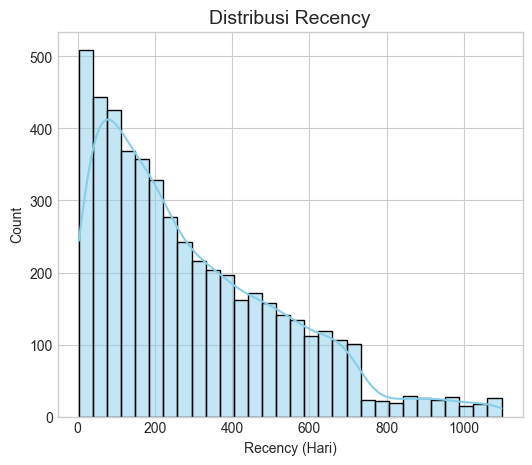

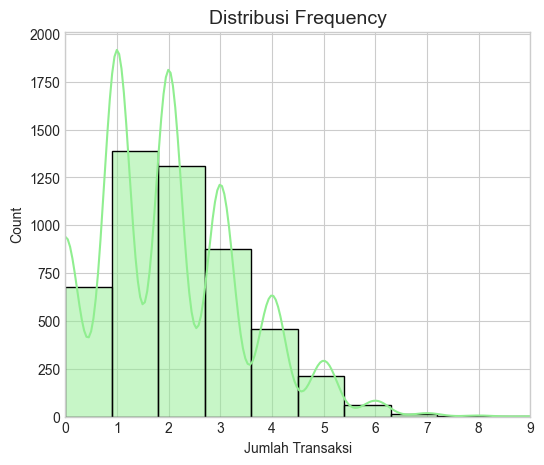

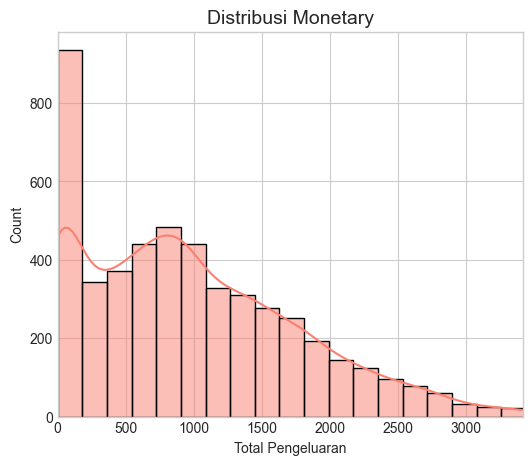

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')

# Plot Recency
plt.figure(figsize=(6,5))
sns.histplot(df['recency'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Recency', fontsize=14)
plt.xlabel('Recency (Hari)')
plt.show()

# Plot Frequency
plt.figure(figsize=(6,5))
sns.histplot(df['frequency'], bins=10, kde=True, color='lightgreen')
plt.title('Distribusi Frequency', fontsize=14)
plt.xlabel('Jumlah Transaksi')
plt.xlim(0, df['frequency'].max())
plt.show()

# Plot Monetary
plt.figure(figsize=(6,5))
sns.histplot(df['monetary'], bins=30, kde=True, color='salmon')
plt.title('Distribusi Monetary', fontsize=14)
plt.xlabel('Total Pengeluaran')
plt.xlim(0, df['monetary'].quantile(0.99))
plt.show()


# Keterangan kode:
# 1. Mengatur style plot menggunakan seaborn whitegrid.
# 2. Membuat figure dengan 3 subplot untuk menampilkan distribusi fitur RFM: recency, frequency, dan monetary.
# 3. Menggunakan sns.histplot untuk membuat histogram dan KDE (kernel density estimation) dari setiap fitur.
# 4. Menyesuaikan sumbu x pada frequency dan monetary agar visualisasi lebih informatif dan tidak terganggu outlier.
# 5. Menampilkan plot dengan layout rapih dan judul utama.


Rata-rata RFM berdasarkan Gender:
  gender     recency  frequency     monetary
0      F  289.565528   2.067911  1048.078463
1      M  297.996777   1.938356   971.524645


C:\Users\LaptopYes\AppData\Local\Temp\ipykernel_10572\2948080356.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='device', y='monetary', data=df, ci=None, palette='viridis')
C:\Users\LaptopYes\AppData\Local\Temp\ipykernel_10572\2948080356.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='device', y='monetary', data=df, ci=None, palette='viridis')


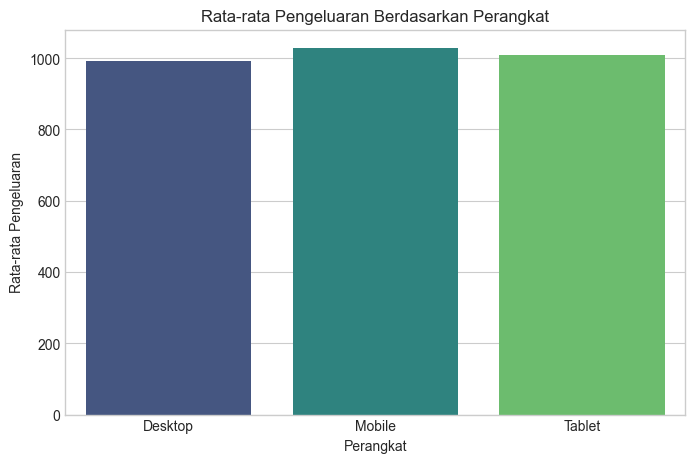

In [11]:
avg_rfm_gender = df.groupby('gender')[['recency', 'frequency', 'monetary']].mean().reset_index()
print("Rata-rata RFM berdasarkan Gender:")
print(avg_rfm_gender)

plt.figure(figsize=(8, 5))
sns.barplot(x='device', y='monetary', data=df, ci=None, palette='viridis')
plt.title('Rata-rata Pengeluaran Berdasarkan Perangkat')
plt.xlabel('Perangkat')
plt.ylabel('Rata-rata Pengeluaran')
plt.show()

In [12]:
churn_threshold = 90

df['churn'] = df.apply(
    lambda row: 1 if row['recency'] > churn_threshold or row['frequency'] == 0 else 0, axis=1
)

churn_counts = df['churn'].value_counts(normalize=True) * 100
print("Distribusi Churn:")
print(churn_counts)

# Keterangan kode:
# 1. Menentukan ambang batas recency (90 hari) untuk mengidentifikasi pelanggan yang berisiko churn.
# 2. Membuat kolom 'churn':
#    - 1 jika pelanggan belum bertransaksi lebih dari 90 hari atau belum pernah melakukan transaksi.
#    - 0 jika pelanggan masih aktif.
# 3. Menghitung dan menampilkan persentase distribusi label churn dalam dataset.

Distribusi Churn:
churn
1    78.58
0    21.42
Name: proportion, dtype: float64



Average RFM for Churn vs. Non-Churn Customers:
          recency  frequency     monetary
churn                                    
0       44.092437   2.975724  1514.219907
1      361.804785   1.738610   872.653657


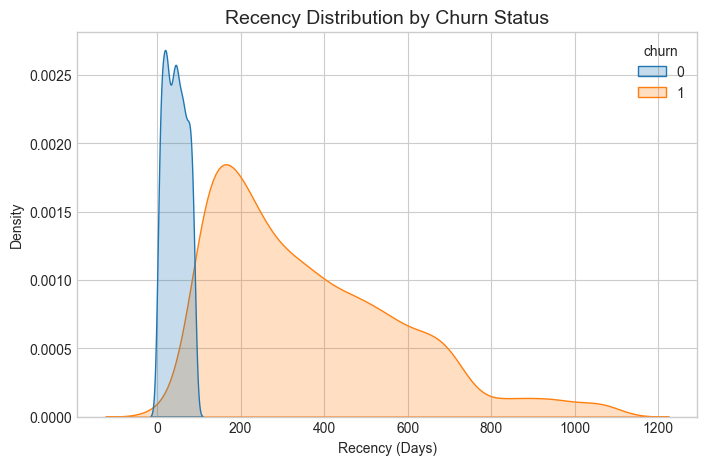

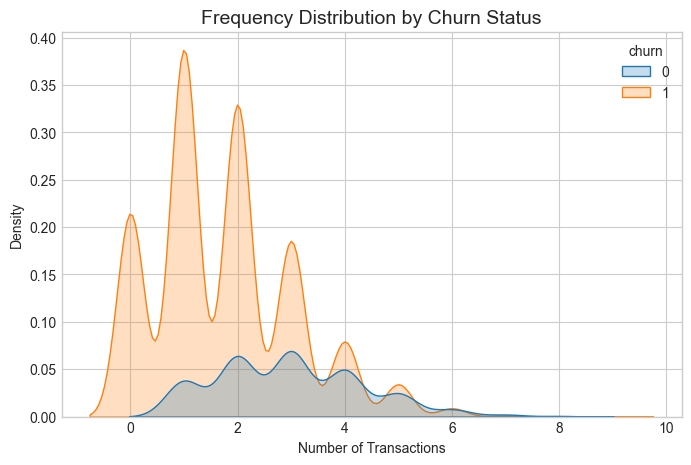

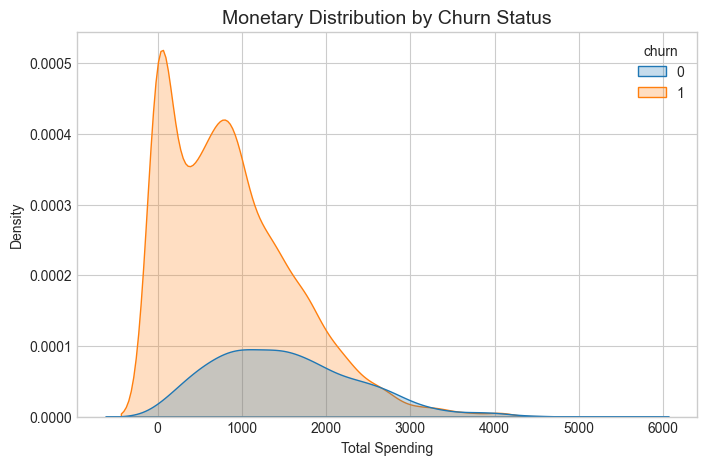

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rata-rata RFM per churn
avg_rfm_churn = df.groupby('churn')[['recency', 'frequency', 'monetary']].mean()
print("\nAverage RFM for Churn vs. Non-Churn Customers:")
print(avg_rfm_churn)

# Recency
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='recency', hue='churn', fill=True)
plt.title('Recency Distribution by Churn Status', fontsize=14)
plt.xlabel('Recency (Days)')
plt.show()

# Frequency
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='frequency', hue='churn', fill=True)
plt.title('Frequency Distribution by Churn Status', fontsize=14)
plt.xlabel('Number of Transactions')
plt.show()

# Monetary
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='monetary', hue='churn', fill=True)
plt.title('Monetary Distribution by Churn Status', fontsize=14)
plt.xlabel('Total Spending')
plt.show()

In [ ]:
df_model = df.drop(columns=['customer_id', 'name', 'join_date', 'last_purchase_date', 'num_transactions', 'total_spent', 'recency'])

X = df_model.drop(columns='churn')
y = df_model['churn']

X = pd.get_dummies(X, columns=['gender', 'region', 'device', 'device_region', 'age_bin', 'monetary_bin'], drop_first=True)

print("Fitur (X) setelah One-Hot Encoding:")
print(X.head())
print("\nTarget (y):")
print(y.head())

Fitur (X) setelah One-Hot Encoding:
   frequency  monetary  customer_age  avg_spent_per_txn  freq_per_month  \
0          2   1777.38           872             888.69        0.068807   
1          2   1188.36           712             594.18        0.084270   
2          0      0.00           296               0.00        0.000000   
3          0      0.00           634               0.00        0.000000   
4          1    157.45           358             157.45        0.083799   

   is_high_value  gender_M  region_Alaska  region_Arizona  region_Arkansas  \
0              1     False          False           False            False   
1              1     False          False           False            False   
2              0     False          False           False            False   
3              0      True          False           False            False   
4              0     False          False           False            False   

   ...  device_region_Tablet_Vermont  device

In [90]:
X.columns.tolist()

['frequency',
 'monetary',
 'customer_age',
 'avg_spent_per_txn',
 'freq_per_month',
 'is_high_value',
 'age_bin',
 'monetary_bin',
 'gender_M',
 'region_Alaska',
 'region_Arizona',
 'region_Arkansas',
 'region_California',
 'region_Colorado',
 'region_Connecticut',
 'region_Delaware',
 'region_Florida',
 'region_Georgia',
 'region_Hawaii',
 'region_Idaho',
 'region_Illinois',
 'region_Indiana',
 'region_Iowa',
 'region_Kansas',
 'region_Kentucky',
 'region_Louisiana',
 'region_Maine',
 'region_Maryland',
 'region_Massachusetts',
 'region_Michigan',
 'region_Minnesota',
 'region_Mississippi',
 'region_Missouri',
 'region_Montana',
 'region_Nebraska',
 'region_Nevada',
 'region_New Hampshire',
 'region_New Jersey',
 'region_New Mexico',
 'region_New York',
 'region_North Carolina',
 'region_North Dakota',
 'region_Ohio',
 'region_Oklahoma',
 'region_Oregon',
 'region_Pennsylvania',
 'region_Rhode Island',
 'region_South Carolina',
 'region_South Dakota',
 'region_Tennessee',
 'region_Te

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2745, number of negative: 755
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1167
[LightGBM] [Info] Number of data points in the train set: 3500, number of used features: 74
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.784286 -> initscore=1.290819
[LightGBM] [Info] Start training from score 1.290819
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

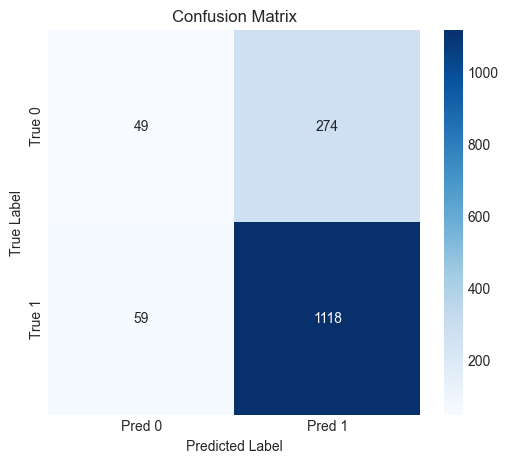

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

lgb_model = lgb.LGBMClassifier(
    random_state=42,
    n_estimators=100,
    learning_rate=0.05, 
    num_leaves=30,       
    max_depth=5,         
    min_child_samples=30 
)

lgb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)

y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]
y_pred = lgb_model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

lgb_model_tuned = lgb.LGBMClassifier(random_state=42, n_estimators=100)
scores = cross_val_score(lgb_model_tuned, X, y, cv=5, scoring='accuracy')

print(f"Skor Akurasi untuk setiap fold: {scores}")
print(f"Rata-rata Akurasi: {scores.mean():.2f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3137, number of negative: 863
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000685 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1428
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 204
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.784250 -> initscore=1.290608
[LightGBM] [Info] Start training from score 1.290608
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3137, number of negative: 863
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1428
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features

C:\Users\LaptopYes\AppData\Local\Temp\ipykernel_4812\823726648.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top5, palette='viridis')


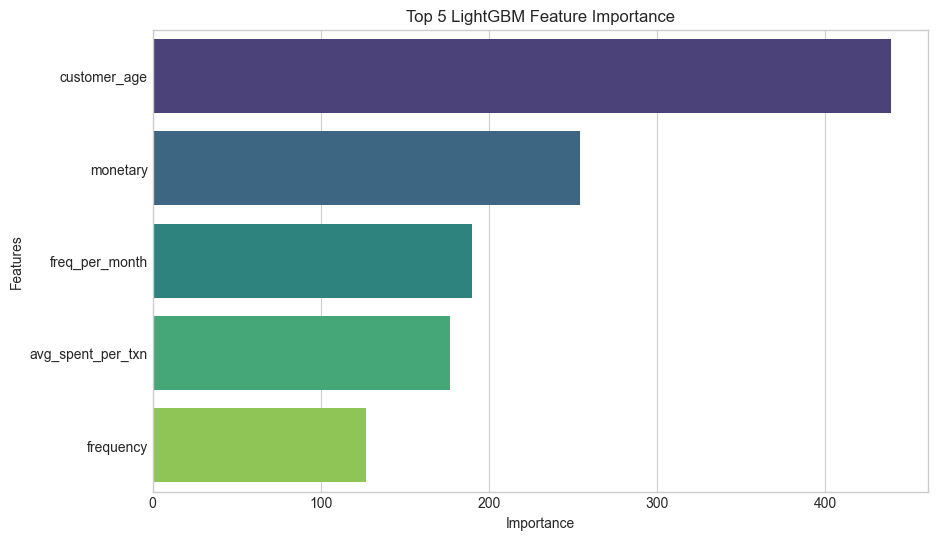

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

importance = lgb_model.feature_importances_
features = X.columns
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importance})
top5 = feat_imp_df.sort_values(by='Importance', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top5, palette='viridis')
plt.title("Top 5 LightGBM Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


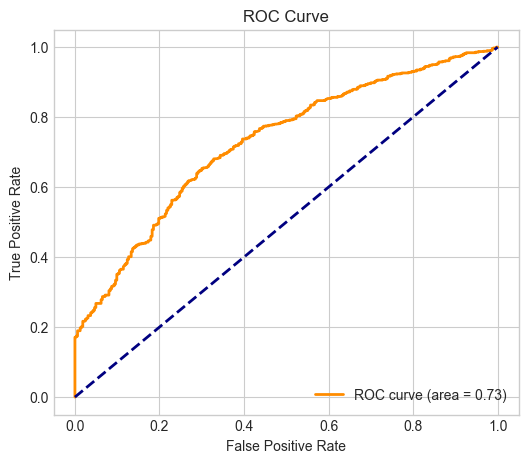

In [99]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


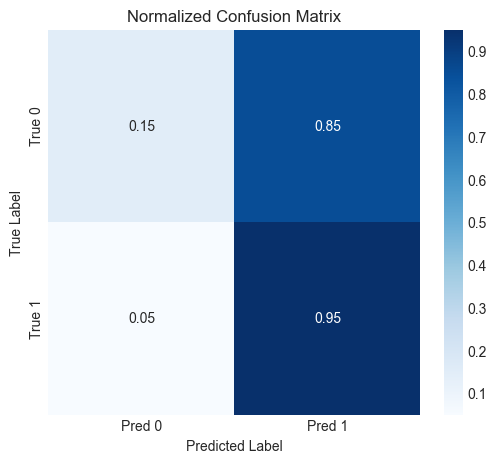

In [100]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
plt.title("Normalized Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


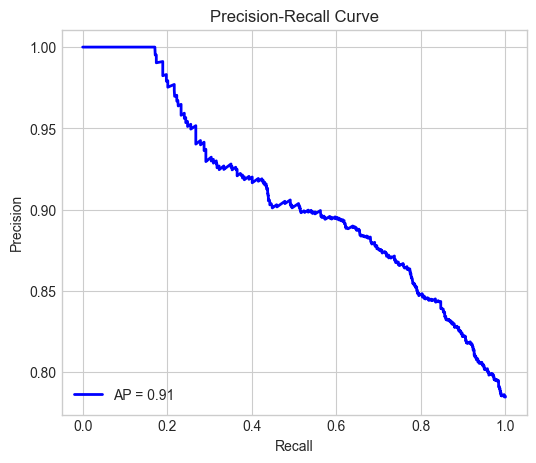

In [101]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='blue', lw=2, label='AP = %0.2f' % avg_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


In [ ]:
pred_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'y_pred_proba': y_pred_proba})
pred_df.to_csv("churn_predictions.csv", index=False)

fi_df = pd.DataFrame({'feature': X.columns, 'importance': lgb_model.feature_importances_})
fi_df = fi_df.sort_values(by='importance', ascending=False)
fi_df.to_csv("feature_importance.csv", index=False)